<a href="https://colab.research.google.com/github/stories-of-life/COVID19-india/blob/develop/covid19_india_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch data from Kaggle

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

!mkdir ~/.kaggle
!cp '/content/gdrive/My Drive/kaggle.json' ~/.kaggle
drive.flush_and_unmount()
!ls ~/.kaggle
!kaggle datasets download -d sudalairajkumar/covid19-in-india

Mounted at /content/gdrive
mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json
covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
!wget http://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip

--2020-04-14 12:45:46--  http://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip [following]
--2020-04-14 12:45:46--  https://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip [following]
--2020-04-14 12:45:47--  https://data.biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14925870 (14M) [application/

# Data Processing

In [19]:
!unzip covid19-in-india.zip -d covid19-in-india
!unzip IND_adm.zip -d IND_adm

Archive:  covid19-in-india.zip
  inflating: covid19-in-india/AgeGroupDetails.csv  
  inflating: covid19-in-india/HospitalBedsIndia.csv  
  inflating: covid19-in-india/ICMRTestingDetails.csv  
  inflating: covid19-in-india/ICMRTestingLabs.csv  
  inflating: covid19-in-india/IndividualDetails.csv  
  inflating: covid19-in-india/StatewiseTestingDetails.csv  
  inflating: covid19-in-india/covid_19_india.csv  
  inflating: covid19-in-india/population_india_census2011.csv  
Archive:  IND_adm.zip
 extracting: IND_adm/IND_adm0.cpg    
  inflating: IND_adm/IND_adm0.csv    
  inflating: IND_adm/IND_adm0.dbf    
  inflating: IND_adm/IND_adm0.prj    
  inflating: IND_adm/IND_adm0.shp    
  inflating: IND_adm/IND_adm0.shx    
 extracting: IND_adm/IND_adm1.cpg    
  inflating: IND_adm/IND_adm1.csv    
  inflating: IND_adm/IND_adm1.dbf    
  inflating: IND_adm/IND_adm1.prj    
  inflating: IND_adm/IND_adm1.shp    
  inflating: IND_adm/IND_adm1.shx    
 extracting: IND_adm/IND_adm2.cpg    
  inflating

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv('covid_19_india.csv')
print(df.shape)
print(df.columns)
df.tail()

(926, 9)
Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
921,922,13/04/20,5:00 PM,Telengana,-,-,100,16,562
922,923,13/04/20,5:00 PM,Tripura,-,-,0,0,2
923,924,13/04/20,5:00 PM,Uttarakhand,-,-,5,0,35
924,925,13/04/20,5:00 PM,Uttar Pradesh,-,-,47,5,483
925,926,13/04/20,5:00 PM,West Bengal,-,-,29,7,152


In [0]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

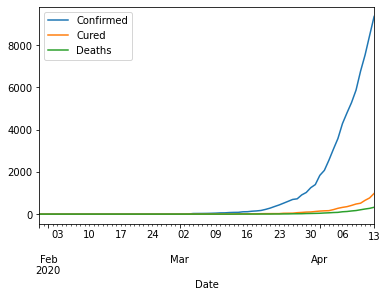

In [16]:
df.groupby(['Date']).sum().reset_index().plot(x='Date',y=['Confirmed','Cured','Deaths'])

# India Map

In [20]:
!pip install pyshp geopandas earthpy

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 1.4MB 42.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.7MB 308kB/s 
     |████████████████████████████████| 10.4MB 38.8MB/s 
     |████████████████████████████████| 18.1MB 237kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.1-cp36-none-any.whl size=1365034 sha256=42bd447de9cdecf9da738ff58bd29517d28f50015a95d9fa971181029f1de64a
  Stored in directory: /root/.cache/pip/wheels/19/73/bc/a463e618369ee186e5427252daabcda420b04be3644b2df40f
Successfully built earthpy


In [0]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [34]:
india = gpd.read_file('IND_adm/IND_adm1.shp')
print(sjer_plot_locations.shape)
sjer_plot_locations.head()

(36, 10)


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [37]:
india.geom_type

0     MultiPolygon
1     MultiPolygon
2          Polygon
3     MultiPolygon
4     MultiPolygon
5          Polygon
6          Polygon
7          Polygon
8     MultiPolygon
9          Polygon
10    MultiPolygon
11    MultiPolygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16    MultiPolygon
17    MultiPolygon
18    MultiPolygon
19         Polygon
20    MultiPolygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25    MultiPolygon
26    MultiPolygon
27         Polygon
28         Polygon
29         Polygon
30    MultiPolygon
31         Polygon
32         Polygon
33         Polygon
34         Polygon
35    MultiPolygon
dtype: object

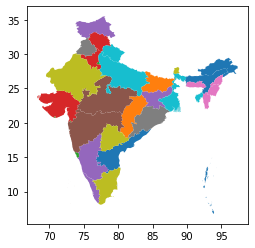

In [39]:
india.plot(column='NAME_1')